### Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Instance Data Merger

In [2]:
root_dir = "/home/nvombat/Desktop/z3r0_7ru57/research/experiments/hpc/experiment2"
output_dir = root_dir

e1_combined = pd.DataFrame()
e2_combined = pd.DataFrame()

# Loop through each folder in the root directory
for folder in sorted(os.listdir(root_dir)):
    folder_path = os.path.join(root_dir, folder)

    if os.path.isdir(folder_path):
        # Find the CSV files in the folder
        for file in os.listdir(folder_path):
            if file.endswith(".csv"):
                file_path = os.path.join(folder_path, file)

                if "experiment_data_e1" in file:
                    df_e1 = pd.read_csv(file_path)
                    e1_combined = pd.concat([e1_combined, df_e1], ignore_index=True)
                elif "experiment_data_e2" in file:
                    df_e2 = pd.read_csv(file_path)
                    e2_combined = pd.concat([e2_combined, df_e2], ignore_index=True)

# Save the concatenated DataFrames
os.makedirs(output_dir, exist_ok=True)
e1_combined.to_csv(os.path.join(output_dir, 'concatenated_e1.csv'), index=False)
e2_combined.to_csv(os.path.join(output_dir, 'concatenated_e2.csv'), index=False)

print("Concatenation Complete. Files Saved To: ", output_dir)

Concatenation Complete. Files Saved To:  /home/nvombat/Desktop/z3r0_7ru57/research/experiments/hpc/experiment2


### Instance Data Visualizer & Analyzer

##### Mean, Median and Standard Deviation of Merged Instance Data

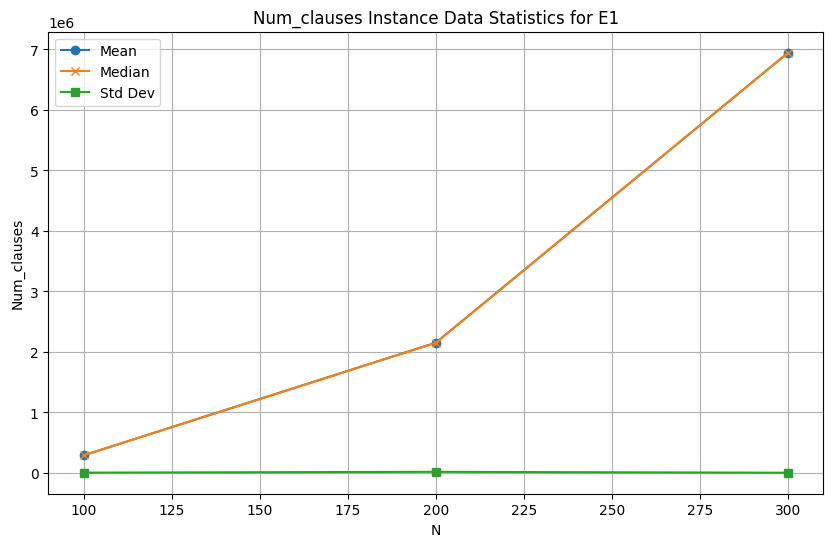

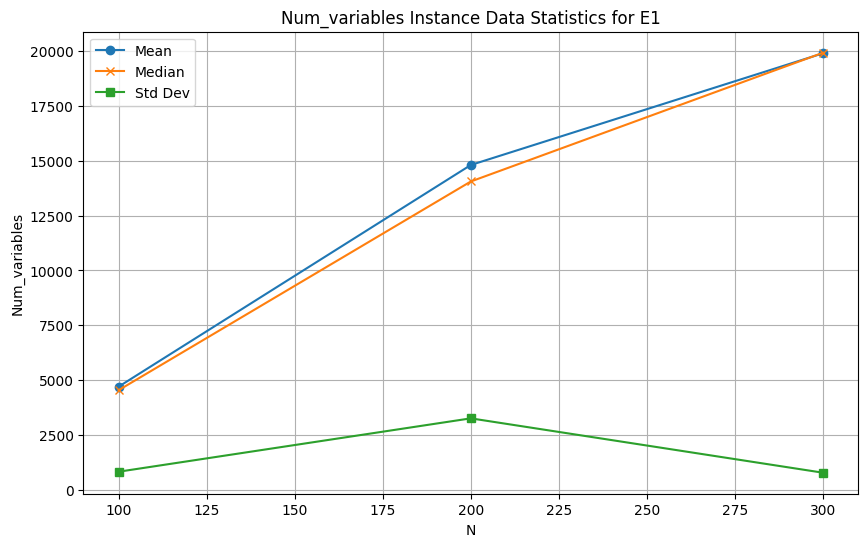

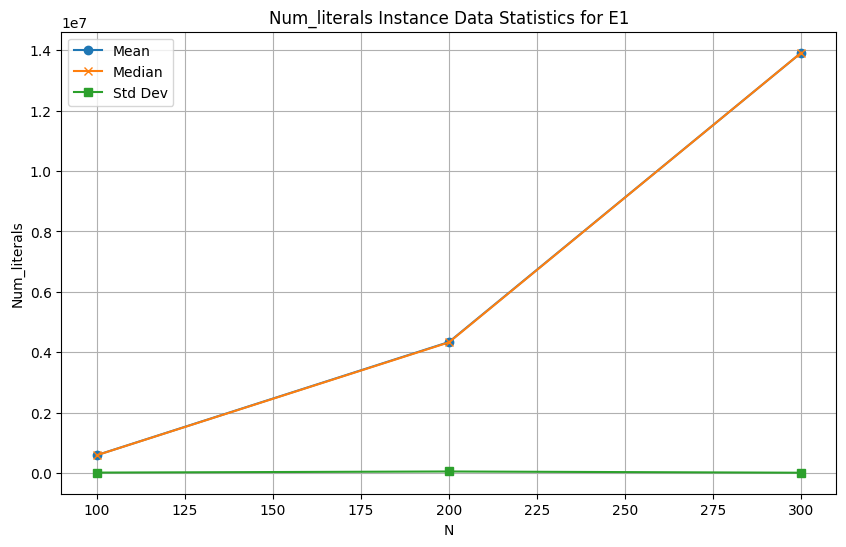

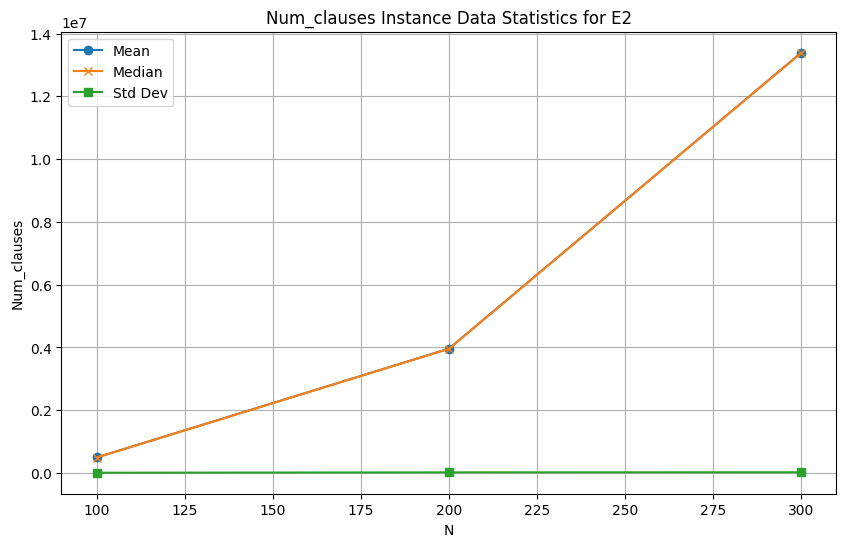

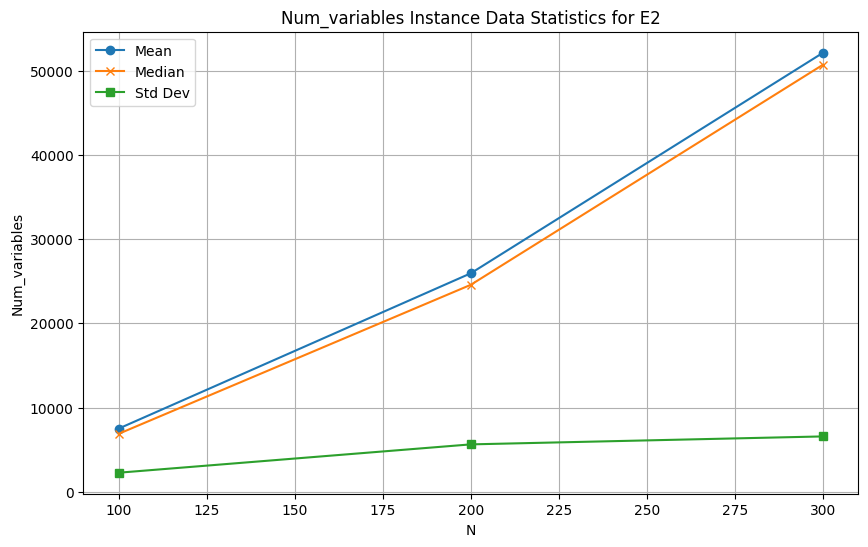

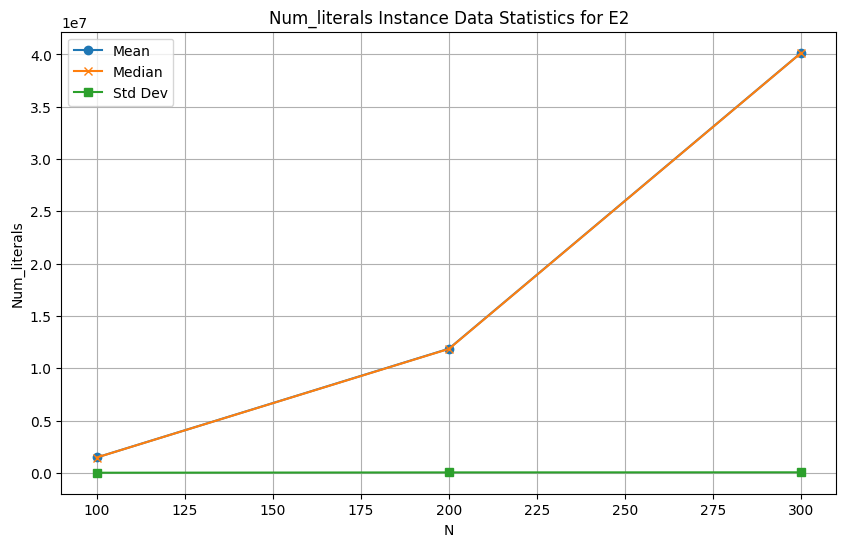

In [5]:
e1_concat_path = os.path.join(root_dir, "concatenated_e1.csv")
e2_concat_path = os.path.join(root_dir, "concatenated_e2.csv")

e1_data = pd.read_csv(e1_concat_path)
e2_data = pd.read_csv(e2_concat_path)

columns_to_analyze = ['num_clauses', 'num_variables', 'num_literals']

def plot_statistics(data, encoding_type):
    # Group by N - calculates the mean, median, and standard deviation for each N
    grouped = data.groupby('N')[columns_to_analyze].agg(['mean', 'median', 'std'])

    # Flatten the multi-index columns
    grouped.columns = ['_'.join(col) for col in grouped.columns]

    for column in columns_to_analyze:
        plt.figure(figsize=(10, 6))

        # Plot mean, median, std
        plt.plot(grouped.index, grouped[f'{column}_mean'], label='Mean', marker='o')
        plt.plot(grouped.index, grouped[f'{column}_median'], label='Median', marker='x')
        plt.plot(grouped.index, grouped[f'{column}_std'], label='Std Dev', marker='s')

        plt.title(f'{column.capitalize()} Instance Data Statistics for {encoding_type}')
        plt.xlabel('N')
        plt.ylabel(column.capitalize())
        plt.legend()
        plt.grid(True)

        plt.show()

plot_statistics(e1_data, 'E1')
plot_statistics(e2_data, 'E2')

##### Mean, Median and Standard Deviation of Individual Instance Data

In [ ]:
src_dir = "/home/nvombat/Desktop/z3r0_7ru57/research/experiments/hpc/"
exp_dir = "experiment1"

sub_dirs = ["N100", "N200", "N300", "N400", "N500", "N600", "N700", "N800", "N900", "N1000"]
selected_sub_dir = sub_dirs[0]

target_dir = os.path.join(src_dir, exp_dir, selected_sub_dir)
print(f"TARGET DIR: {target_dir}")

In [ ]:
filename1 = "experiment_data_e1.csv"
file_path1 = os.path.join(target_dir, filename1)

print(f"FILE PATH [E1]: {file_path1}")

In [ ]:
df1 = pd.read_csv(file_path1)

df1

In [ ]:
averages_e1 = df1[['num_clauses', 'num_variables', 'num_literals']].mean()
print("[E1] Averages: \n", averages_e1)

print("--------------------")

median_values_e1 = df1[['num_clauses', 'num_variables', 'num_literals']].median()
print("[E1] Median Values: \n", median_values_e1)

print("--------------------")

std_values_e1 = df1[['num_clauses', 'num_variables', 'num_literals']].std()
print("[E1] Standard Deviation Values: \n", std_values_e1)


In [ ]:
filename2 = "experiment_data_e2.csv"
file_path2 = os.path.join(target_dir, filename2)

print(f"FILE PATH [E2]: {file_path2}")

In [ ]:
df2 = pd.read_csv(file_path2)

df2

In [ ]:
averages_e2 = df2[['num_clauses', 'num_variables', 'num_literals']].mean()
print("[E2] Averages: \n", averages_e2)

print("--------------------")

median_values_e2 = df2[['num_clauses', 'num_variables', 'num_literals']].median()
print("[E2] Median Values: \n", median_values_e2)

print("--------------------")

std_values_e2 = df2[['num_clauses', 'num_variables', 'num_literals']].std()
print("[E2] Standard Deviation Values: \n", std_values_e2)